# ОИАД. Лабораторная работа №2

## Входные данные
Датасет: **datasets/students_simple.csv**
Выбираются 2 слобкика данных по формулам:
1) $N \\% 5$
2) $N^2 \\% 5 + 5$
где $N$ - номер в списке

## 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла

## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:
1. линейная, $y=w_1 x + w_0$
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 
4. показательная, $y = w_1^x \cdot w_0$

Показать результаты на графиках

## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера

## 5. Выводы
Сделать вывод по каждому пункту

# Выбор варианта

In [1]:
N = 7
NN = N**2
variants = ["height","test_time","income","iq","pages","age","bmi","work_exp","friends","test_time"]
print(variants[N%len(variants)])
print(variants[NN%len(variants)])

work_exp
test_time


# Считываем файл и столбики для варианта

In [2]:
import csv
import numpy as np
work_exp = []
test_time = []
with open('students_simple.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        work_exp.append(float(row['work_exp']))
        test_time.append(float(row['test_time']))

work_exp = np.array(work_exp)
test_time = np.array(test_time)

print("work_exp:")
print(work_exp)
print(f'Len: {len(work_exp)}')

print("test_time:")
print(test_time)
print(f'Len: {len(test_time)}')

work_exp:
[ 26.  63.  94.  16.  49.  14.  78.  10. 130.  20.  86.  29.  75.  22.
  32.  21.  96.  70.  59.  98.]
Len: 20
test_time:
[ 8.5  6.2  6.8 12.   7.5 10.   7.2  4.2  3.5  9.5  7.8  8.   6.   4.8
  8.6 10.   4.5 12.5 10.5  6.5]
Len: 20


## 1. Расчет корреляций
1.Фехнера
 
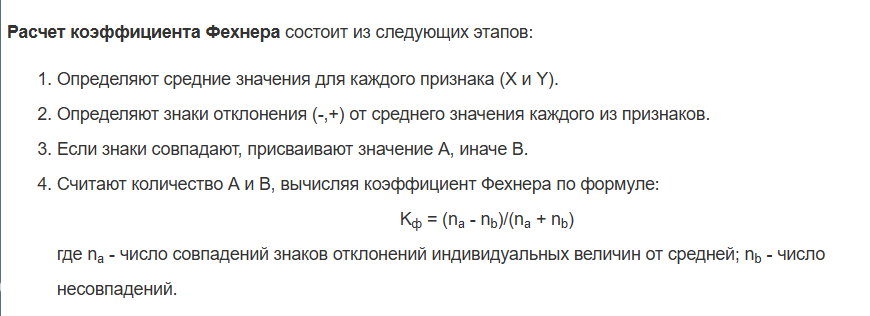

In [3]:
import numpy as np

def calculate_mean(data):
    mean = sum(data) / len(data)
    return mean

def correlation_fechner(x, y): #просто считаем коэффициент
    x_mean = calculate_mean(x)
    y_mean = calculate_mean(y)

    x_signs = np.sign(x - x_mean) # Знаки отклонения
    y_signs = np.sign(y - y_mean)

    matches = np.sum(x_signs == y_signs) # A
    mismatches = np.sum(x_signs != y_signs) #B

    fechner = (matches - mismatches) / (matches + mismatches) # Коэффицент Фехнера
    
    return fechner

print(f'Fechner correlation: {correlation_fechner(work_exp, test_time)}')

Fechner correlation: -0.4


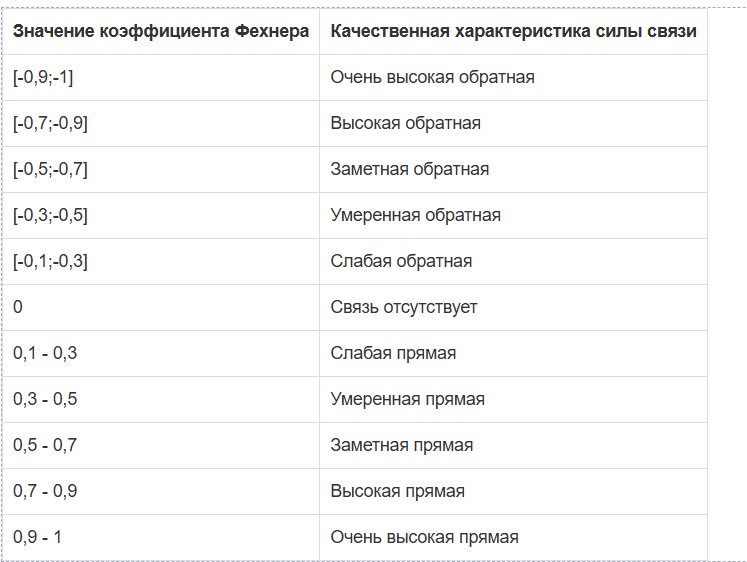

Коэфицент корреляции -0.4, что указывает на умеренную обратную корреляцию

# 2. Пирсона + доверительный интервал

# Коэфицент:
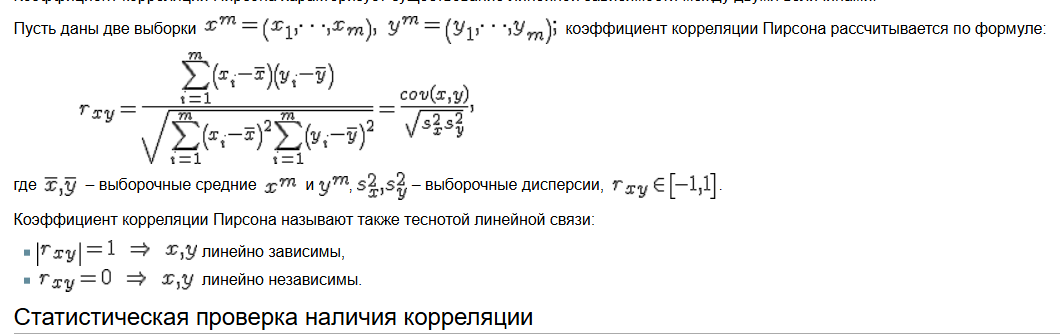

# T-статистика
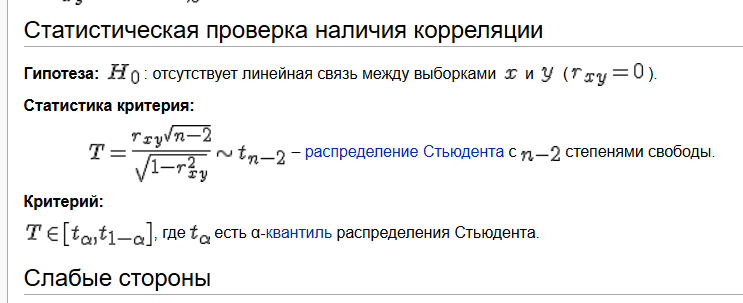

# Превращение Фишера
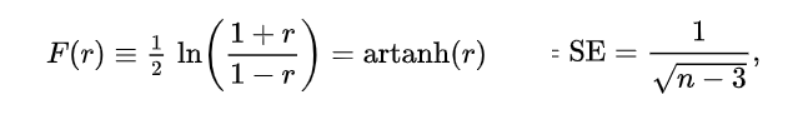

In [4]:
import scipy.stats as stats

def cov(x, y): #ковариация
    sum = 0
    x_mean = calculate_mean(x)
    y_mean = calculate_mean(y)
    
    for i in range(0, len(x)):
        sum += ((x[i] - x_mean) * (y[i] - y_mean))
        
    return sum/(len(x))


def correlation_pearson(x,y, confidence=0.95):

    n = len(x)
    
    covariance = cov(x,y)
    std_x = np.sqrt(np.sum((x - calculate_mean(x)) ** 2) / (n - 1)) #стандартные отклонения; (n - 1) тк несмещённая оценка
    std_y = np.sqrt(np.sum((y - calculate_mean(y)) ** 2) / (n - 1))

    coef = covariance / (std_x * std_y) # коэфицент Пирсона (просто посчитали число)
    #==============================================================================#
    #появляется гипотеза Н0: нету связи между переменными
    #альтернативная гипотеза Н1: связь есть

    
    t_statistic = coef * np.sqrt((n - 2) / (1 - coef ** 2)) # т статистика (формула из теории) для построения доверительного интервала
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), n - 2)) # p_value, табличное значение; -2 тк 2 критерия оцениваем; 1- тк гипотеза что нет связи
    #p_value означает вероятность что наша Н0 верна
    
    #Преобразование Фишера — это статистический "трюк"
    #который позволяет нам работать с коэффициентом корреляции как с нормально распределенной величиной
    #что значительно упрощает построение точных доверительных интервалов и проверку гипотез.
    z = np.arctanh(coef)  # Преобразование Фишера (гиперболический арктангенс); приведение к нормальному распределению
    se_z = 1 / np.sqrt(n - 3) # стандартная ошибка (для поправку на размер выборки)
    
    z_critical = stats.norm.ppf((1 + confidence) / 2) # критическое значение
    
    # Доверительный интервал для z
    z_lower = z - z_critical * se_z
    z_upper = z + z_critical * se_z
    
    # Обратное преобразование к r (возвращаемся к нашему неизвестному распределению)
    r_lower = np.tanh(z_lower)
    r_upper = np.tanh(z_upper)
    return {
        'correlation': coef,
        'p_value': p_value,
        't_statistic': t_statistic,
        'ci_lower': r_lower,
        'ci_upper': r_upper,
        'confidence_level': confidence
    }


print(correlation_pearson(work_exp, test_time))

{'correlation': np.float64(-0.3956455330827694), 'p_value': np.float64(0.08421744394916497), 't_statistic': np.float64(-1.8277175676385093), 'ci_lower': np.float64(-0.713283638133138), 'ci_upper': np.float64(0.05682408834869657), 'confidence_level': 0.95}


# Выводы
Корреляция {'correlation': np.float64(-0.3956455330827694) указывает на умеренную обратную связь

p_value низок, значит мы не можем сказать, что гипотеза Н0 подтвердилась, но, тк мы не проверили гипотезу Н1, то мы не можем уверенно сказать, что какая-то из гипотез верная

'ci_lower': np.float64(-0.713283638133138), 'ci_upper': np.float64(0.05682408834869657)

Доверительный интервал содержит корреляцию, значит есть вероятность что переменные связаны

# 3. Спирмена
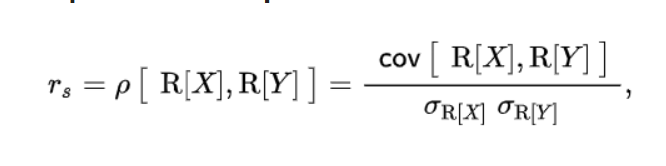

In [30]:
import math

def get_ranks(data): #если отсортировать вборку, какие значения получат какие "места в рейтинге"

    indexed_data = [(value, idx) for idx, value in enumerate(data)] #назначаем номера для пар чтобы потом найти
    
    sorted_data = sorted(indexed_data, key=lambda x: x[0]) #сортируем
    
    ranks = [0] * len(data) #создаём пустой массив
    
    i = 0
    while i < len(sorted_data):
        # Находим группу одинаковых значений
        j = i #номера в массиве
        while (j < len(sorted_data) - 1 and 
               math.isclose(sorted_data[j][0], sorted_data[j + 1][0])): #находим равные значения, "связи"
            j += 1
        
        # Количество связей (идут подряд с одинаковым значением)
        tie_count = j - i + 1
        # Средний ранг для равных значений
        average_rank = (i + 1 + j + 1) / 2
        # Присваиваем средний ранг всем элементам группы
        for k in range(i, j + 1):
            original_index = sorted_data[k][1] #изначальная позиция в неотсортированной выборке
            ranks[original_index] = average_rank
        
        i = j + 1
    
    return ranks
    
def correlation_spearman(x, y): #просто коэффициент

    n = len(x)
    
    x_ranks = get_ranks(x) #ищем ранги массивов
    y_ranks = get_ranks(y)
    
    covariance = cov(x_ranks,y_ranks) #ковариация рангов
    
    std_x = math.sqrt(sum((r - calculate_mean(x_ranks)) ** 2 for r in x_ranks)) #стандартные отклонения рангов, знаменатель в формуле
    std_y = math.sqrt(sum((r - calculate_mean(y_ranks)) ** 2 for r in y_ranks))
    
    if std_x * std_y == 0:
        return 0
    else:
        spearman = covariance / (std_x * std_y) 
    
    return spearman



In [31]:
print(f'Spearman correlation: {correlation_spearman(work_exp, test_time)}')

Spearman correlation: -0.021022942441958327


Указывает на полное отсутсвтие корреляции

# 4. Кенделла
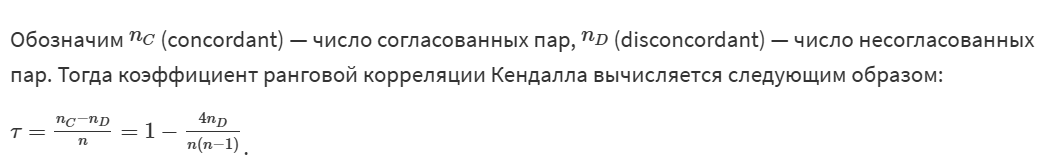

In [32]:
def count_ties(ranks):
    
    rank_counts = {}
    for rank in ranks:
        rank_counts[rank] = rank_counts.get(rank, 0) + 1 #считаем сколько каких значений встречается в ранках
    
    ties = 0
    for count in rank_counts.values():
        if count > 1:
            ties += count * (count - 1) / 2
    
    return ties
    
def correlation_kendall(x, y): #считает число

    n = len(x)
    
    ranks_x = get_ranks(x) #ищем ранги
    ranks_y = get_ranks(y)
    
    concordant = 0 # согласованные пары
    discordant = 0 # несогласованные пары
    
    # Перебираем все уникальные пары (i, j) где i < j
    for i in range(n):
        for j in range(i + 1, n):
            dx = ranks_x[i] - ranks_x[j]#считаем разницу между рангами пар
            dy = ranks_y[i] - ranks_y[j]
            
            # Если оба различия имеют одинаковый знак - согласованная пара
            if dx * dy > 0:
                concordant += 1
            # Если знаки разные - несогласованная пара
            elif dx * dy < 0:
                discordant += 1
            # Если dx = 0 или dy = 0 - это связь, не учитывается
    
    total_pairs = n * (n - 1) / 2 #общее количество пар (чтобы не было что одни пары учтены 2 раза)
    
    ties_x = count_ties(ranks_x) #считаем количество связей
    ties_y = count_ties(ranks_y)
    
    # Корректировка общего количества пар с учетом связей
    adjusted_total = math.sqrt((total_pairs - ties_x) * (total_pairs - ties_y)) #число пар, которые не повторяются
    
    if adjusted_total == 0:
        tau = 0.0
    else:
        tau = (concordant - discordant) / adjusted_total
    
    return tau

In [8]:
print(f'Kendall correlation: {correlation_kendall(work_exp, test_time)}')

Kendall correlation: -0.34300910954987274


Умеренная обратная корреляция

In [9]:
print(f'Fechner correlation: {correlation_fechner(work_exp, test_time)}')
print(f'Pearson correlation: {correlation_pearson(work_exp, test_time)['correlation']}')
print(f'Spearman correlation: {correlation_spearman(work_exp, test_time)}')
print(f'Kendall correlation: {correlation_kendall(work_exp, test_time)}')

Fechner correlation: -0.4
Pearson correlation: -0.3956455330827694
Spearman correlation: -0.002467699787663935
Kendall correlation: -0.34300910954987274


## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

In [10]:
import matplotlib.pyplot as plt

def plot_histogram(data, bins=10, title="Гистограмма"):

    plt.figure(figsize=(10, 6))
    
    n, bins, patches = plt.hist(data, bins=bins, alpha=0.7, color='skyblue', 
                               edgecolor='black', density=True)
    
    plt.title(title, fontsize=14)
    plt.xlabel('Значения', fontsize=12)
    plt.ylabel('Плотность вероятности', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

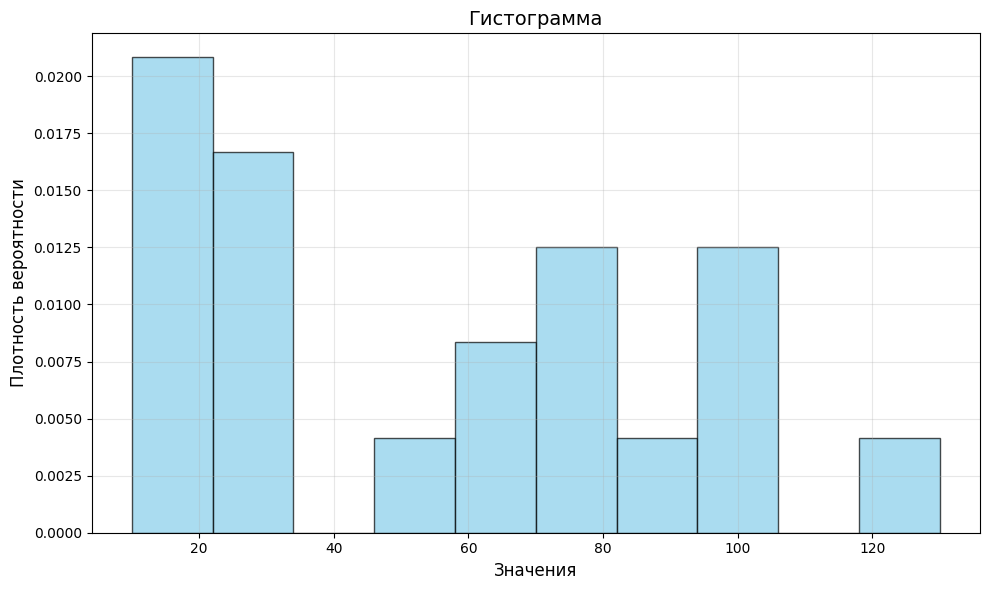

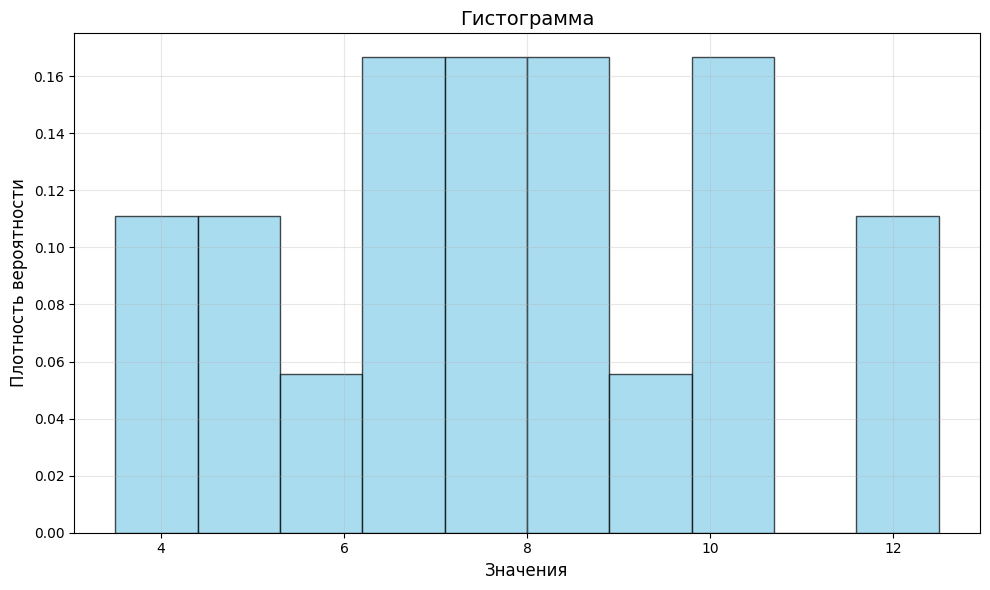

In [11]:
plot_histogram(work_exp)
plot_histogram(test_time)

In [12]:
def scatter_plot(array, title="Scatter Plot", xlabel="Index", ylabel="Values", color='blue', alpha=0.7):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(array)), array, color=color, alpha=alpha, s=50)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


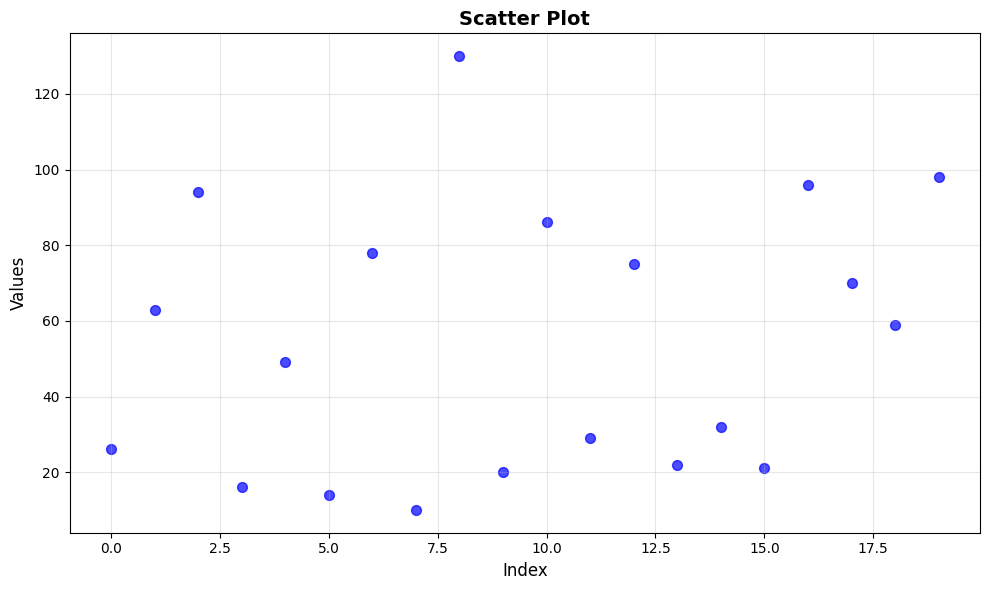

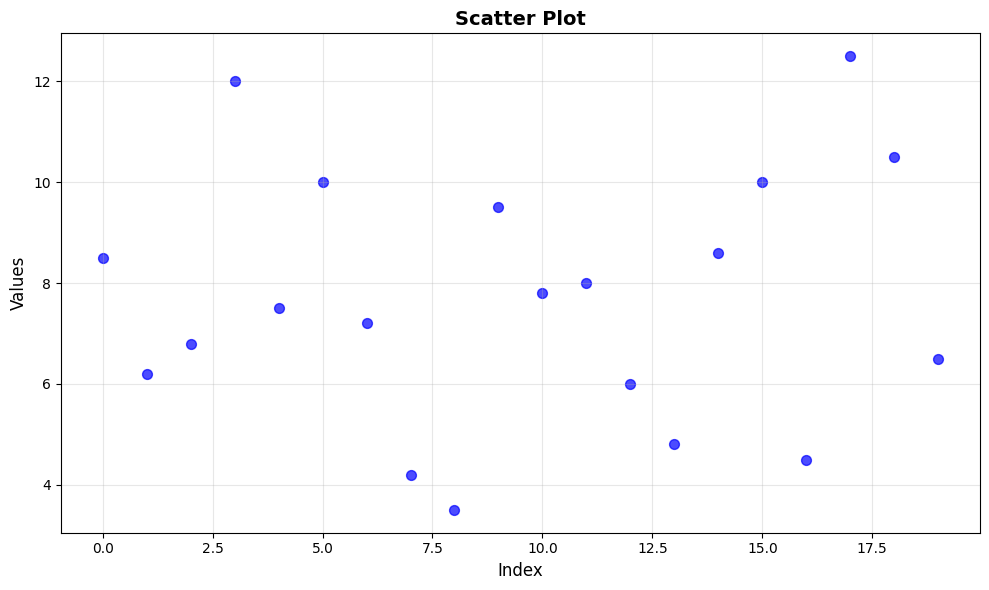

In [13]:
scatter_plot(work_exp)
scatter_plot(test_time)

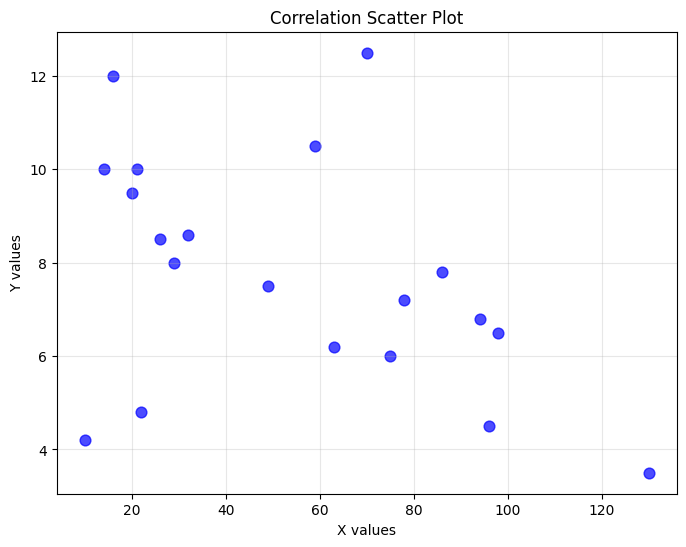

In [5]:
import matplotlib.pyplot as plt
import numpy as np



# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(work_exp, test_time, alpha=0.7, color='blue', s=60)

# Add labels and title
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Correlation Scatter Plot')

# Add grid
plt.grid(True, alpha=0.3)

plt.show()

# По графику видно некую обратную корреляцию

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:
1. линейная, $y=w_1 x + w_0$
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 
4. показательная, $y = w_1^x \cdot w_0$

Показать результаты на графиках

# 1. Линейная регрессия

# Вычисление параметров регрессии:
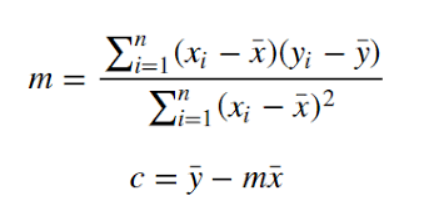

# Вычисление коэфицента детерминации:
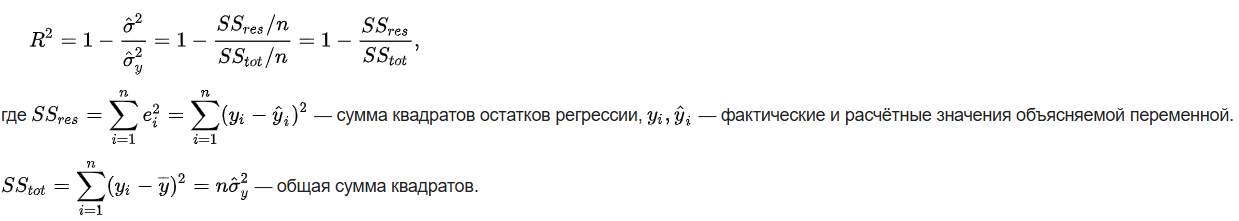


In [15]:
def linear_regression(x, y):

    n = len(x)
    
    mean_x = calculate_mean(x)
    mean_y = calculate_mean(y)
    
    num = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n)) # Числитель в формуле m
    den = sum((x[i] - mean_x) ** 2 for i in range(n)) # Знаменатель в формуле ,
    m = num / den
    b = mean_y - m * mean_x
    

    y_pred = [m * xi + b for xi in x] # "Предсказанные" значения с определёнными параметрами m и b

    # вычисление коэфицента детерминации
    ss_total = sum((yi - mean_y) ** 2 for yi in y) # общая сумма квадратов
    ss_res = sum((y[i] - y_pred[i]) ** 2 for i in range(n)) # сумма квадратов остатков регрессии
    r2 = 1 - (ss_res / ss_total)
    
    print(f"Regression line: y = {m:.4f}x + {b:.4f}")
    plt.scatter(x, y, color="blue", label="Data points")
    plt.plot(x, y_pred, color="red", label="Regression line")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()
        
    return m, b, r2


Regression line: y = -0.0298x + 9.3504


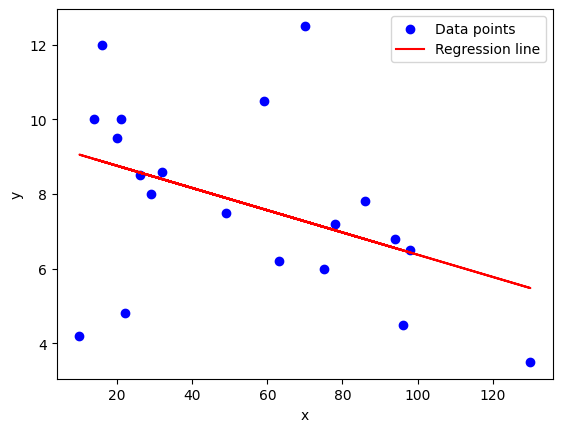

R^2 0.17344641312836429


In [16]:
_, _, r2_linear = linear_regression(work_exp, test_time)
print(f'R^2 {r2_linear}')

# Полученная прямая плохо аппроксимирует значения, и коэфицент $R^2$ достаточно низкий, что говорит о вероятном отсутствии корреляции

# 2. Квадратическая регрессия

# Функция для минимизации:
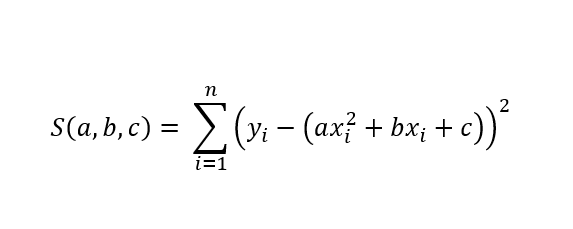

# В частных производных 

∂S/∂a=0 
∂𝑆/∂𝑏=0 
∂S/∂c=0

Получим систему:

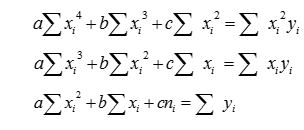

In [17]:
import numpy as np

def quadratic_regression(x, y):
    n = len(x)
    X = [[xi**2, xi, 1] for xi in x]
    
    Sx4 = sum(xi**4 for xi in x) # высчитываем суммы из системы - сумма x в 1,2,3,4 степенях
    Sx3 = sum(xi**3 for xi in x)
    Sx2 = sum(xi**2 for xi in x)
    Sx1 = sum(xi for xi in x)
    Sx0 = n
    
    Sy = sum(y) # суммы из системы - сумма y*x в 0,1,2 степенях
    Sx1y = sum(x[i]*y[i] for i in range(n))
    Sx2y = sum((x[i]**2)*y[i] for i in range(n))

    # Матрица системы
    A = [
        [Sx4, Sx3, Sx2],
        [Sx3, Sx2, Sx1],
        [Sx2, Sx1, Sx0]
    ]
    # Правая часть
    B = [Sx2y, Sx1y, Sy]

    # Решаем линейное уравнение встроенным решением 
    coeffs = np.linalg.solve(np.array(A, dtype=float), np.array(B, dtype=float))
    a, b, c = coeffs
    
    y_pred = [a*xi**2 + b*xi + c for xi in x] #"Предсказанные" значения с определёнными параметрами 

    # вычисление коэфицента детерминации
    mean_y = sum(y)/n
    ss_tot = sum((yi-mean_y)**2 for yi in y)# общая сумма квадратов
    ss_res = sum((y[i]-y_pred[i])**2 for i in range(n)) # сумма квадратов остатков регрессии
    r2 = 1 - ss_res/ss_tot
    

    print(f"Quadratic regression: y = {a:.4f}x² + {b:.4f}x + {c:.4f}, R²={r2:.4f}")
    plt.scatter(x, y, color="blue")
    plt.plot(sorted(x), [a*xi**2 + b*xi + c for xi in sorted(x)], color="red")
    plt.show()
    
    return a, b, c, r2

Quadratic regression: y = -0.0007x² + 0.0591x + 7.5096, R²=0.2789


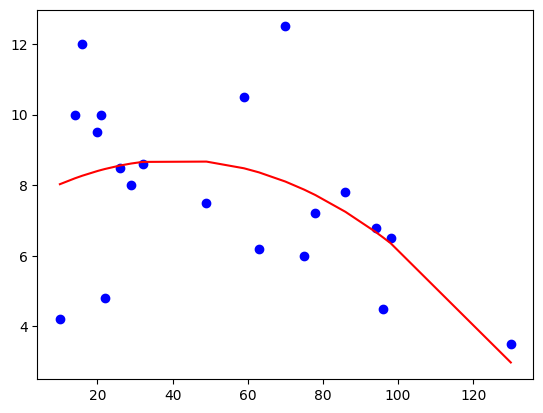

R^2 0.2788892200567593


In [18]:
_, _, _, r2_quadratic = quadratic_regression(work_exp, test_time)
print(f'R^2 {r2_quadratic}')

# Квадратичная регрессия выглядит ближе к точкам, и коэфицент $R^2$ выше

# 3. Гиперблоическая регрессия
Те же самые формулы что и для линейное регрессии, но с предварительной трансформацеий $z=1/x$

In [19]:
def hyperbolic_regression(x, y):
    
    # Трансформация z = 1/x
    z = [1/xi for xi in x]
    
    
    n = len(z)
    mean_z = sum(z) / n
    mean_y = sum(y) / n

    # Высчитываем параметры по тем же формулам что и в линейной регрессии, но для трансформированных данных
    num = sum((z[i] - mean_z) * (y[i] - mean_y) for i in range(n))
    den = sum((z[i] - mean_z) ** 2 for i in range(n))
    m = num / den
    b = mean_y - m * mean_z

    # Модель: y = m*(1/x) + b
    y_pred = [m/xi + b for xi in x] #Предсказания с полученными параметрами
    
    # вычисление коэфицента детерминации
    ss_total = sum((yi - mean_y) ** 2 for yi in y) # общая сумма квадратов
    ss_res = sum((y[i] - y_pred[i]) ** 2 for i in range(n)) # сумма квадратов остатков регрессии
    r2 = 1 - (ss_res / ss_total)
    
    print(f"Hyperbolic regression: y = {m:.4f}/x + {b:.4f}, R²={r2:.4f}")
    plt.scatter(x, y, color="blue")
    plt.plot(sorted(x), [m/xi + b for xi in sorted(x)], color="red")
    plt.show()
    
    return m, b, r2

Hyperbolic regression: y = 14.5591/x + 7.2747, R²=0.0209


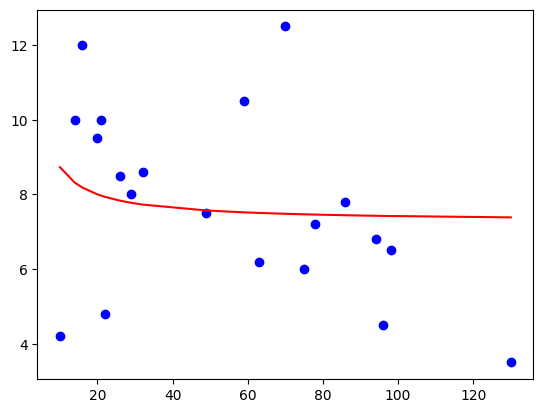

R^2 0.02094396439616153


In [20]:
_, _, r2_hyperbolic = hyperbolic_regression(work_exp, test_time)
print(f'R^2 {r2_hyperbolic}')

# Самая худшая регрессия 

# Показательная регрессия

Те же самые формулы что и для линейное регрессии, но с предварительной трансформацеий $x=ln(x)$ $y=ln(y)$

In [21]:
def power_regression(x, y):
    
    logx = [math.log(xi) for xi in x]# Трансформация x=ln(x)
    logy = [math.log(yi) for yi in y]# Трансформация y=ln(y)
    
 
    n = len(logx)
    mean_logx = sum(logx) / n
    mean_logy = sum(logy) / n
    #Вычисление по формулам линейной регрессии
    num = sum((logx[i] - mean_logx) * (logy[i] - mean_logy) for i in range(n))
    den = sum((logx[i] - mean_logx) ** 2 for i in range(n))
    b = num / den
    loga = mean_logy - b * mean_logx

    
    a = math.exp(loga) #Обратное преобразование
    
    y_pred = [a * (xi**b) for xi in x]
    
    # вычисление коэфицента детерминации
    mean_y = sum(y)/len(y)
    ss_tot = sum((yi-mean_y)**2 for yi in y)
    ss_res = sum((y[i]-y_pred[i])**2 for i in range(len(y)))
    r2 = 1 - ss_res/ss_tot
    
    print(f"Power regression: y = {a:.4f} * x^{b:.4f}, R²={r2:.4f}")
    plt.scatter(x, y, color="blue")
    plt.plot(sorted(x), [a*(xi**b) for xi in sorted(x)], color="red")
    plt.show()
    
    return a, b, r2

Power regression: y = 11.8849 * x^-0.1294, R²=0.0553


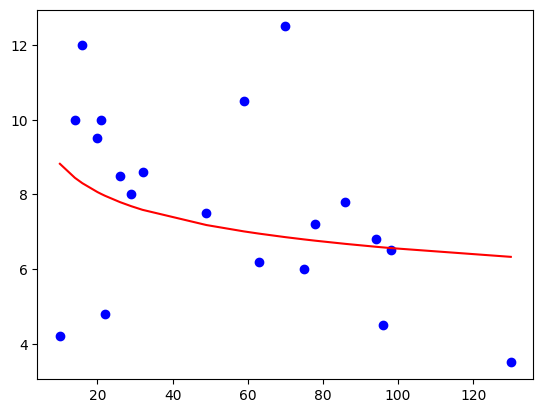

R^2 0.05525448402979938


In [22]:
_, _, r2_power = power_regression(work_exp, test_time)
print(f'R^2 {r2_power}')

## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера


In [23]:
print(f'Linear: {r2_linear}')
print(f'Quadratic: {r2_quadratic}')
print(f'Hyperbolic: {r2_hyperbolic}')
print(f'Power: {r2_power}')

Linear: 0.17344641312836429
Quadratic: 0.2788892200567593
Hyperbolic: 0.02094396439616153
Power: 0.05525448402979938


# Самое лучшее уравнение - квадратичное. Самое худшее - гиперболическое
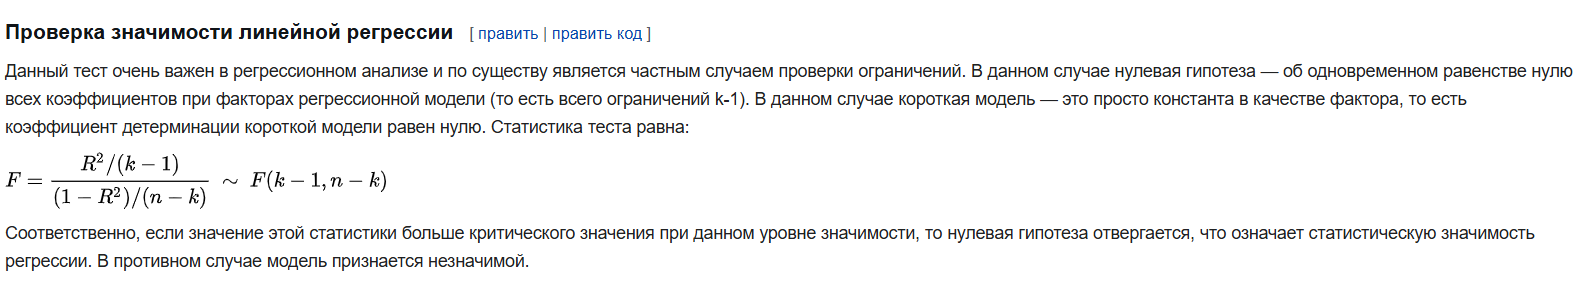

In [24]:
from scipy.stats import f

def quadratic_regression_test(x, y, alpha=0.05):
    n = len(x)
    X = [[xi**2, xi, 1] for xi in x]
    
    Sx4 = sum(xi**4 for xi in x)
    Sx3 = sum(xi**3 for xi in x)
    Sx2 = sum(xi**2 for xi in x)
    Sx1 = sum(xi for xi in x)
    Sx0 = n
    
    Sy = sum(y)
    Sx1y = sum(x[i]*y[i] for i in range(n))
    Sx2y = sum((x[i]**2)*y[i] for i in range(n))
    
    A = [
        [Sx4, Sx3, Sx2],
        [Sx3, Sx2, Sx1],
        [Sx2, Sx1, Sx0]
    ]
    B = [Sx2y, Sx1y, Sy]
    
    coeffs = np.linalg.solve(np.array(A, dtype=float), np.array(B, dtype=float))
    a, b, c = coeffs
    
    y_pred = [a*xi**2 + b*xi + c for xi in x]
    
    mean_y = sum(y)/n
    ss_tot = sum((yi-mean_y)**2 for yi in y)
    ss_res = sum((y[i]-y_pred[i])**2 for i in range(n))
    r2 = 1 - ss_res/ss_tot
    
    k = 3  # 3 параметра в модели
    df_reg = k - 1  # степени свободы для регрессии
    df_res = n - k  # степени свободы для остатков
    ms_reg = (ss_tot - ss_res) / df_reg  # средний квадрат регрессии
    ms_res = ss_res / df_res  # средний квадрат остатков
    
    f_statistic = ms_reg / ms_res #f-статистика
    
    f_critical = f.ppf(1 - alpha, df_reg, df_res) # табличное значение
    
    is_model_adequate = f_statistic > f_critical 
    
    print(f"R² = {r2:.4f}")
    print(f"F-statistic = {f_statistic:.4f}")
    print(f"F-critical (α={alpha}) = {f_critical:.4f}")
    print(f"Model is adequate: {is_model_adequate}")
    print(f"SS_reg = {ss_tot - ss_res:.4f}, SS_res = {ss_res:.4f}")
    print(f"MS_reg = {ms_reg:.4f}, MS_res = {ms_res:.4f}")
    print(f"Degrees of freedom: regression = {df_reg}, residual = {df_res}")
        
    
    return f_statistic, f_critical, is_model_adequate

In [25]:
print(f'{quadratic_regression_test(work_exp, test_time)[2]}')
print('============================================')
print(f'{quadratic_regression_test(work_exp, test_time, alpha =0.1)[2]}')


R² = 0.2789
F-statistic = 3.2874
F-critical (α=0.05) = 3.5915
Model is adequate: False
SS_reg = 33.7294, SS_res = 87.2126
MS_reg = 16.8647, MS_res = 5.1302
Degrees of freedom: regression = 2, residual = 17
False
R² = 0.2789
F-statistic = 3.2874
F-critical (α=0.1) = 2.6446
Model is adequate: True
SS_reg = 33.7294, SS_res = 87.2126
MS_reg = 16.8647, MS_res = 5.1302
Degrees of freedom: regression = 2, residual = 17
True


In [26]:
from scipy.stats import f
import matplotlib.pyplot as plt

def hyperbolic_regression_test(x, y, silent=False, alpha=0.05):
    # Трансформация z = 1/x
    z = [1/xi for xi in x]
    
    n = len(z)
    mean_z = sum(z) / n
    mean_y = sum(y) / n

    # Высчитываем параметры по тем же формулам что и в линейной регрессии, но для трансформированных данных
    num = sum((z[i] - mean_z) * (y[i] - mean_y) for i in range(n))
    den = sum((z[i] - mean_z) ** 2 for i in range(n))
    m = num / den
    b = mean_y - m * mean_z

    # Модель: y = m*(1/x) + b
    y_pred = [m/xi + b for xi in x] #Предсказания с полученными параметрами
    
    # вычисление коэфицента детерминации
    ss_total = sum((yi - mean_y) ** 2 for yi in y) # общая сумма квадратов
    ss_res = sum((y[i] - y_pred[i]) ** 2 for i in range(n)) # сумма квадратов остатков регрессии
    r2 = 1 - (ss_res / ss_total)
    
    # Расчет F-статистики для проверки адекватности модели
    k = 2  # 2 параметра в модели (m, b)
    df_reg = k - 1  # степени свободы для регрессии
    df_res = n - k  # степени свободы для остатков
    
    # Средние квадраты
    ms_reg = (ss_total - ss_res) / df_reg  # средний квадрат регрессии
    ms_res = ss_res / df_res  # средний квадрат остатков
    
    # F-статистика
    f_statistic = ms_reg / ms_res
    
    # Критическое значение F-распределения
    f_critical = f.ppf(1 - alpha, df_reg, df_res)
    
    # Проверка гипотезы
    is_model_adequate = f_statistic > f_critical

    print(f"Hyperbolic regression: y = {m:.4f}/x + {b:.4f}")
    print(f"R² = {r2:.4f}")
    print(f"F-statistic = {f_statistic:.4f}")
    print(f"F-critical (α={alpha}) = {f_critical:.4f}")
    print(f"Model is adequate: {is_model_adequate}")
    print(f"SS_reg = {ss_total - ss_res:.4f}, SS_res = {ss_res:.4f}")
    print(f"MS_reg = {ms_reg:.4f}, MS_res = {ms_res:.4f}")
    print(f"Degrees of freedom: regression = {df_reg}, residual = {df_res}")
        
    return f_statistic, f_critical, is_model_adequate

In [27]:
print(hyperbolic_regression_test(work_exp, test_time)[2])
print('============================================')
print(f'{hyperbolic_regression_test(work_exp, test_time, alpha =0.1)[2]}')


Hyperbolic regression: y = 14.5591/x + 7.2747
R² = 0.0209
F-statistic = 0.3851
F-critical (α=0.05) = 4.4139
Model is adequate: False
SS_reg = 2.5330, SS_res = 118.4090
MS_reg = 2.5330, MS_res = 6.5783
Degrees of freedom: regression = 1, residual = 18
False
Hyperbolic regression: y = 14.5591/x + 7.2747
R² = 0.0209
F-statistic = 0.3851
F-critical (α=0.1) = 3.0070
Model is adequate: False
SS_reg = 2.5330, SS_res = 118.4090
MS_reg = 2.5330, MS_res = 6.5783
Degrees of freedom: regression = 1, residual = 18
False


# Как видим, согласно критерию Фишера наша модель является адекватной при квадратичной регрессии, но только при уровне значимости alpha = 0.1. Ожидаемо, модель гиперболической регрессии является неадекватной